# Pre Processing

# Notebook Content
[Libraries used](#Libraries)<br>
[Data Preprocessing](#Data-Preprocessing)<br>
## Missing Values Treatment
[Missing Value Treatment](#Missing-Value-Treatment)<br>
[Missing Value Treatment with mean](#Mean-or-median-or-other-summary-statistic-substitution)<br>
[Forward and Backward fill](#Forward-fill-and-backward-fill-(can-be-used-according-to-business-problem))<br>
[Nearest neighbors imputation](#Nearest-neighbors-imputation)<br>
[Multivaraiate Imputation](#Multivariate-Imputation)<br>
## Data Transformations
[Data Transformations](#Data-Transformation)<br>
[Scale Transformation](#Scale-Transformation)<br>
[Centre Transformation](#Centre-Transformation)<br>
[Standardize Transformation](#Standardize-Transformation)<br>
[Data Normalization](#Normalization)<br>
[Box-Cox Transform](#Box-Cox-Transform)<br>
[Yeo-Johnson Transform](#Yeo-Johnson-Transform)<br>
[Principal Component Analysis](#Principal-Component-Analysis)<br>
[Tips For Data Transforms](#Tips-For-Data-Transforms)<br>
## Encoding
[Handling Categorical Variable](#Handling-Categorical-Variable)<br>
[One Hot Encoding](#One-Hot-Encoding)<br>
[Label Encoding](#Label-Encoding)<br>
[Hashing](#Hashing)<br>
## Embedding
[Embedding](#EMBEDDING)<br>
[CountVectorizer](#CountVectorizer)<br>
[TF-IDF Vectorizer](#TF-IDF-Vectorizer)<br>
[Stemming](#Stemming)<br>
[Lemmatization](#Lemmatization)<br>

# Libraries

In [ ]:
# install.packages('caTools')
# install.packages("ROCR")
# install.packages('glmnet')
# install.packages('rpart')
# install.packages('caret')
# install.packages('rpart.plot')
# install.packages('rattle')
# install.packages('tidyverse')
# install.packages('nnet')
# install.packages('caret')
# install.packages('e1071')
# install.packages('class')
# install.packages('gmodels')
# install.packages("mlbench")
# install.packages("tidyr")
# install.packages("DMwR")
# install.packages("mice")
# install.packages("superml")
# install.packages('devtools')
# install.packages("textmineR")
# install.packages("textstem")
# install.packages("qdap")
# install.packages("tm")
# options(warn=-1)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Data Preprocessing

Pre-processing refers to the **transformations applied to data** before feeding it to the algorithm. Data Preprocessing is a technique that is used to **convert the raw data into a clean data set**. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis, pre-processing heps us to bring our data to a desired format.

## Need for Data Preprocessing

**For achieving better results** from the applied model in Machine Learning projects the format of the data has to be in a proper manner. Some specified Machine Learning models need information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set. Another aspect is that data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithms are executed in one data set, and best out of them is chosen.

## Different data preprocesses

The different pre processing techniques are listed below; we will look into each of it in detail:

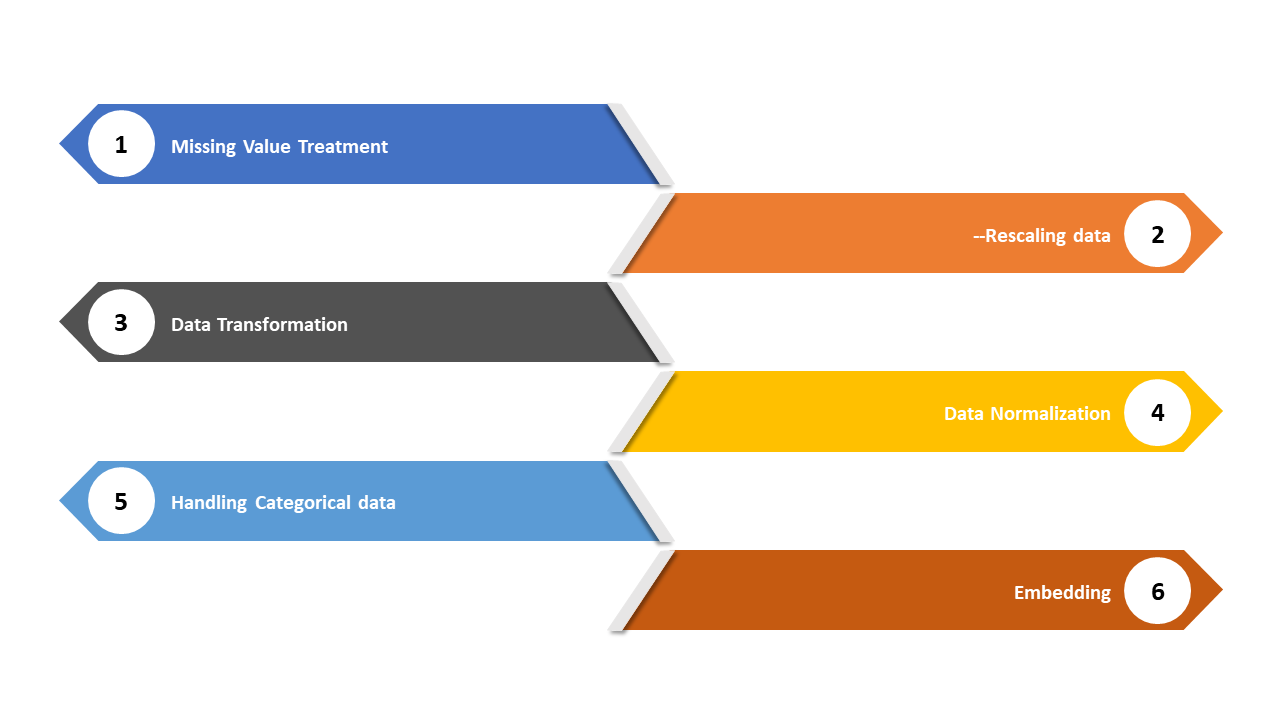

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# __Missing Value Treatment__
The options we have for handling missing values are as follows:<br>
1. Drop missing values
2. Fill missing value 
3. Predict missing value with maching learning algoritm

## Imputation vs Removing Data
Before jumping to the methods of data imputation, we have to understand the reason why data goes missing.
1. **Missing completely at random**: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
2. **Missing at random**: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.
3. **Missing that depends on unobserved predictors**: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
4. **Missing that depends on the missing value itself**: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.
 

## Drop missing values

**Simple approaches**<br>
A number of simple approaches exist. For basic use cases, these are often enough.<br><br>
**Dropping rows with null values**
1. If the number of data points is sufficiently high that dropping some of them will not cause lose generalizability in the models built (to determine whether or not this is the case, a learning curve can be used)
2. Dropping too much data is also dangerous
3. If in a large data set is present and missinng values is in range of 5-3%; then droping missing values is feasible

In [2]:
library(tidyr)
options(warn=-1)
Country <- c('France','Spain','Germany','Spain')
Salary <- c(44000, NA, 35000,55000)
Age <- c(44,35,NA,55)
employ<- data.frame(Country, Salary,Age)
print('Dataset with Null values')
employ

print('Null values dropped')
employ %>% drop_na()

[1] "Dataset with Null values"


Country,Salary,Age
<fct>,<dbl>,<dbl>
France,44000,44
Spain,NA,35
Germany,35000,NA
Spain,55000,55


[1] "Null values dropped"


Country,Salary,Age
<fct>,<dbl>,<dbl>
France,44000,44
Spain,55000,55


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

## Mean or median or other summary statistic substitution
When to use example:
1. Check outlier, if less outliers is present then use mean imputation 
2. When outliers are more median impuation can be used 
3. For categorical variables use mode

<br>**NOTE:**- Ok to use if missing data is less than 3%, otherwise introduces too much bias and artificially lowers variability of data

In [3]:
Country <- c('France','Spain','Germany','Spain')
Salary <- c(44000, NA, 35000,55000)
Age <- c(44,35,NA,55)
employ<- data.frame(Country, Salary,Age)
print('Dataset with NA values in Salary & Age')
employ


employ$Age <- ifelse(is.na(employ$Age), 
                      ave(employ$Age, FUN = function(x) 
                        mean(x, na.rm = TRUE)), 
                      employ$Age)

employ$Salary <- ifelse(is.na(employ$Salary), 
                      ave(employ$Salary, FUN = function(x) 
                        mean(x, na.rm = TRUE)), 
                      employ$Salary)
print('Missing values handled with its mean value')  
employ                        

[1] "Dataset with NA values in Salary & Age"


Country,Salary,Age
<fct>,<dbl>,<dbl>
France,44000,44
Spain,NA,35
Germany,35000,NA
Spain,55000,55


[1] "Missing values handled with its mean value"


Country,Salary,Age
<fct>,<dbl>,<dbl>
France,44000.00,44.00000
Spain,44666.67,35.00000
Germany,35000.00,44.66667
Spain,55000.00,55.00000


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

## Forward fill and backward fill (can be used according to business problem)
Forward filling means fill missing values with previous data. Backward filling means fill missing values with next data point.

In [4]:
library(data.table) 
options(warn=-1)
dataset <- structure(list(id = c("foo", "foo", "foo", "foo", "foo", "bar", 
        "bar", "bar", "bar", "bar"), value = c("blue", NA, NA, "red", 
            NA, "green", "green", NA, NA, NA), timestamp = structure(c(1571348572.31003, 
                1571348632.31003, 1571348692.31003, 1571348752.31003, 1571348812.31003, 
                1571348872.31003, 1571348932.31003, 1571348992.31003, 1571349052.31003, 
                1571349112.31003), class = c("POSIXct", "POSIXt"))), row.names = c(NA, 
                    -10L), class = "data.frame")
print('Dataset')
dataset

setDT(dataset)[, value := zoo::na.locf(value, FALSE), id]
print(" NA values handled by forward fill")
dataset

[1] "Dataset"


id,value,timestamp
<chr>,<chr>,<dttm>
foo,blue,2019-10-18 03:12:52
foo,NA,2019-10-18 03:13:52
foo,NA,2019-10-18 03:14:52
foo,red,2019-10-18 03:15:52
foo,NA,2019-10-18 03:16:52
bar,green,2019-10-18 03:17:52
bar,green,2019-10-18 03:18:52
bar,NA,2019-10-18 03:19:52
bar,NA,2019-10-18 03:20:52


[1] " NA values handled by forward fill"


id,value,timestamp
<chr>,<chr>,<dttm>
foo,blue,2019-10-18 03:12:52
foo,blue,2019-10-18 03:13:52
foo,blue,2019-10-18 03:14:52
foo,red,2019-10-18 03:15:52
foo,red,2019-10-18 03:16:52
bar,green,2019-10-18 03:17:52
bar,green,2019-10-18 03:18:52
bar,green,2019-10-18 03:19:52
bar,green,2019-10-18 03:20:52


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

### Nearest neighbors imputation
It can be used for data that are continuous, discrete, ordinal and categorical which makes it particularly useful for dealing with all kind of missing data. The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables. <br><br>The distance metric varies according to the type of data:
1. **Continuous Data**: The commonly used distance metrics for continuous data are Euclidean, Manhattan and Cosine
2. **Categorical Data**: Hamming distance is generally used in this case. It takes all the categorical attributes 
    
**DMwR::knnImputation** uses k-Nearest Neighbours approach to impute missing values. What kNN imputation does in simpler terms is as follows: For every observation to be imputed, it identifies ‘k’ closest observations based on the euclidean distance and computes the weighted average (weighted based on distance) of these ‘k’ obs.
The advantage is that you could impute all the missing values in all variables with one call to the function. It takes the whole data frame as the argument and you don’t even have to specify which variable you want to impute
    

In [5]:
# initialize the data
data ("BostonHousing", package="mlbench")
original <- BostonHousing  # backup original data

# Introduce missing values
set.seed(10)
BostonHousing[sample(1:nrow(BostonHousing), 40), "rad"] <- NA
BostonHousing[sample(1:nrow(BostonHousing), 40), "ptratio"]

print('Boston Housing Dataset')
head(BostonHousing, n = 10L)



[1] 20.2 14.7 19.6 18.2 17.8 18.5 18.4 17.8 20.2 16.6 16.6 13.0 20.2 20.2 20.2
[16] 17.8 18.8 17.9 20.2 15.2 20.1 20.2 16.4 17.0 14.7 20.2 21.0 17.6 18.6 17.9
[31] 14.7 21.0 20.2 20.2 21.0 18.4 21.2 17.4 18.6 20.2

[1] "Boston Housing Dataset"


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [6]:
# perform knn imputation.
library(DMwR)
options(warn=-1)
knnOutput <- knnImputation(BostonHousing[, !names(BostonHousing) %in% "medv"])  
print('Imputed using DMwR library for KNN')
head(knnOutput)

Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "Imputed using DMwR library for KNN"


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

## Multivariate Imputation

Mice short for Multivariate Imputation by Chained Equations is an R package that provides advanced features for missing value treatment. It uses a slightly uncommon way of implementing the imputation in 2-steps, using mice() to build the model and complete() to generate the completed data. The mice(df) function produces multiple complete copies of df, each with different imputations of the missing data. The complete() function returns one or several of these data sets, with the default being the first. Lets see how to impute ‘rad’ and ‘ptratio’:

In [7]:
library(mice)
options(warn=-1)
miceMod <- mice(BostonHousing[, !names(BostonHousing) %in% "medv"], method="rf")  # perform mice imputation, based on random forests.
miceOutput <- complete(miceMod)  # generate the completed data.
head(miceOutput)


Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind





 iter imp variable
  1   1  rad
  1   2  rad
  1   3  rad
  1   4  rad
  1   5  rad
  2   1  rad
  2   2  rad
  2   3  rad
  2   4  rad
  2   5  rad
  3   1  rad
  3   2  rad
  3   3  rad
  3   4  rad
  3   5  rad
  4   1  rad
  4   2  rad
  4   3  rad
  4   4  rad
  4   5  rad
  5   1  rad
  5   2  rad
  5   3  rad
  5   4  rad
  5   5  rad


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Data Transformation

When data is comprised of attributes with varying scales, many machine learning algorithms can benefit from transforming the attributes to all have the same scale. This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent.
It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like K-Nearest Neighbors. We can rescale data using different techniques, some of which are listed below.

Transforms can be used in two ways.<br>
- **Standalone:** Transforms can be modeled from training data and applied to multiple datasets.<br>The model of the transform is prepared using the preProcess() function and applied to a dataset using the predict() function.<br>

- **Training:** Transforms can prepared and applied automatically during model evaluation.<br>Transforms applied during training are prepared using the preProcess() and passed to the train() function via the preProcess argument.



**Note:**
Before performing the below transformations one should check for oultiers and Treat them.<br>
</t></t> _Check the EDA Notebook for various outlier treament method_

# Scale Transformation
The scale transform calculates the standard deviation for an attribute and divides each value by that standard deviation.


In [8]:
# load libraries
library(caret)
options(warn=-1)
# load the dataset
data(iris)
# summarize data
print('RawData')
summary(iris[,1:4])
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(iris[,1:4], method=c("scale"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams, iris[,1:4])
# summarize the transformed dataset
print('Scale Transofrmed Data')
summary(transformed)

Loading required package: ggplot2



[1] "RawData"


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

Created from 150 samples and 4 variables

Pre-processing:
  - ignored (0)
  - scaled (4)

[1] "Scale Transofrmed Data"


  Sepal.Length    Sepal.Width      Petal.Length     Petal.Width    
 Min.   :5.193   Min.   : 4.589   Min.   :0.5665   Min.   :0.1312  
 1st Qu.:6.159   1st Qu.: 6.424   1st Qu.:0.9064   1st Qu.:0.3936  
 Median :7.004   Median : 6.883   Median :2.4642   Median :1.7055  
 Mean   :7.057   Mean   : 7.014   Mean   :2.1288   Mean   :1.5734  
 3rd Qu.:7.729   3rd Qu.: 7.571   3rd Qu.:2.8890   3rd Qu.:2.3615  
 Max.   :9.540   Max.   :10.095   Max.   :3.9087   Max.   :3.2798  

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Centre Transformation

The center transform calculates the mean for an attribute and subtracts it from each value.

In [9]:
# load libraries
library(caret)
# load the dataset
data(iris)
# summarize data
print('RawData')
summary(iris[,1:4])
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(iris[,1:4], method=c("center"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams, iris[,1:4])
# summarize the transformed dataset
print('Centre Transformed Data')
summary(transformed)

[1] "RawData"


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

Created from 150 samples and 4 variables

Pre-processing:
  - centered (4)
  - ignored (0)

[1] "Centre Transformed Data"


  Sepal.Length       Sepal.Width        Petal.Length     Petal.Width     
 Min.   :-1.54333   Min.   :-1.05733   Min.   :-2.758   Min.   :-1.0993  
 1st Qu.:-0.74333   1st Qu.:-0.25733   1st Qu.:-2.158   1st Qu.:-0.8993  
 Median :-0.04333   Median :-0.05733   Median : 0.592   Median : 0.1007  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.000   Mean   : 0.0000  
 3rd Qu.: 0.55667   3rd Qu.: 0.24267   3rd Qu.: 1.342   3rd Qu.: 0.6007  
 Max.   : 2.05667   Max.   : 1.34267   Max.   : 3.142   Max.   : 1.3007  

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Standardize Transformation
Combining the scale and center transforms will standardize your data. Attributes will have a mean value of 0 and a standard deviation of 1

In [10]:
# load libraries
library(caret)
# load the dataset
data(iris)
# summarize data
print('Raw data')
summary(iris[,1:4])
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(iris[,1:4], method=c("center", "scale"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams, iris[,1:4])
# summarize the transformed dataset
print('Standardized Transformation')
summary(transformed)

[1] "Raw data"


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

Created from 150 samples and 4 variables

Pre-processing:
  - centered (4)
  - ignored (0)
  - scaled (4)

[1] "Standardized Transformation"


  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.86378   Min.   :-2.4258   Min.   :-1.5623   Min.   :-1.4422  
 1st Qu.:-0.89767   1st Qu.:-0.5904   1st Qu.:-1.2225   1st Qu.:-1.1799  
 Median :-0.05233   Median :-0.1315   Median : 0.3354   Median : 0.1321  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.67225   3rd Qu.: 0.5567   3rd Qu.: 0.7602   3rd Qu.: 0.7880  
 Max.   : 2.48370   Max.   : 3.0805   Max.   : 1.7799   Max.   : 1.7064  

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Normalization
Is the process of **scaling individual samples to have unit norm**. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.<br>
The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the l1 or l2 norms. Normalizer __works on the rows, not the columns!__ 


In [11]:
# load libraries
library(caret)
# load the dataset
data(iris)
# summarize data
print('Raw Data')
summary(iris[,1:4])
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(iris[,1:4], method=c("range"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams, iris[,1:4])
# summarize the transformed dataset
print('Normalized Data')
summary(transformed)

[1] "Raw Data"


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

Created from 150 samples and 4 variables

Pre-processing:
  - ignored (0)
  - re-scaling to [0, 1] (4)

[1] "Normalized Data"


  Sepal.Length     Sepal.Width      Petal.Length     Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Box-Cox Transform
When an attribute has a Gaussian-like distribution but is shifted, this is called a skew. The distribution of an attribute can be shifted to reduce the skew and make it more Gaussian. The BoxCox transform can perform this operation (assumes all values are positive).

In [12]:
# load libraries
# install.packages("mlbench")
# install.packages(caret)
library(mlbench)
library(caret)
# load the dataset
print('Raw Data')
data(PimaIndiansDiabetes)
# summarize pedigree and age
summary(PimaIndiansDiabetes[,7:8])
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(PimaIndiansDiabetes[,7:8], method=c("BoxCox"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams, PimaIndiansDiabetes[,7:8])
# summarize the transformed dataset (note pedigree and age)
print('Box Transformed data')
summary(transformed)

[1] "Raw Data"


    pedigree           age       
 Min.   :0.0780   Min.   :21.00  
 1st Qu.:0.2437   1st Qu.:24.00  
 Median :0.3725   Median :29.00  
 Mean   :0.4719   Mean   :33.24  
 3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :2.4200   Max.   :81.00  

Created from 768 samples and 2 variables

Pre-processing:
  - Box-Cox transformation (2)
  - ignored (0)

Lambda estimates for Box-Cox transformation:
-0.1, -1.1
[1] "Box Transformed data"


    pedigree            age        
 Min.   :-2.5510   Min.   :0.8772  
 1st Qu.:-1.4116   1st Qu.:0.8815  
 Median :-0.9875   Median :0.8867  
 Mean   :-0.9599   Mean   :0.8874  
 3rd Qu.:-0.4680   3rd Qu.:0.8938  
 Max.   : 0.8838   Max.   :0.9019  

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Yeo-Johnson Transform
Another power-transform like the Box-Cox transform, but it supports raw values that are equal to zero and negative.

In [13]:
# load the dataset
data(PimaIndiansDiabetes)
# load libraries
library(mlbench)
library(caret)
# load the dataset
print('Raw Data')
data(PimaIndiansDiabetes)
# summarize pedigree and age
summary(PimaIndiansDiabetes[,7:8])
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(PimaIndiansDiabetes[,7:8], method=c("YeoJohnson"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams, PimaIndiansDiabetes[,7:8])
# summarize the transformed dataset (note pedigree and age)
print('Yeo Johnson Transformed')
summary(transformed)

[1] "Raw Data"


    pedigree           age       
 Min.   :0.0780   Min.   :21.00  
 1st Qu.:0.2437   1st Qu.:24.00  
 Median :0.3725   Median :29.00  
 Mean   :0.4719   Mean   :33.24  
 3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :2.4200   Max.   :81.00  

Created from 768 samples and 2 variables

Pre-processing:
  - ignored (0)
  - Yeo-Johnson transformation (2)

Lambda estimates for Yeo-Johnson transformation:
-2.25, -1.15
[1] "Yeo Johnson Transformed"


    pedigree           age        
 Min.   :0.0691   Min.   :0.8450  
 1st Qu.:0.1724   1st Qu.:0.8484  
 Median :0.2265   Median :0.8524  
 Mean   :0.2317   Mean   :0.8530  
 3rd Qu.:0.2956   3rd Qu.:0.8580  
 Max.   :0.4164   Max.   :0.8644  

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Principal Component Analysis
Transform the data to the principal components. The transform keeps components above the variance threshold (default=0.95) or the number of components can be specified (pcaComp). The result is attributes that are uncorrelated, useful for algorithms like linear and generalized linear regression.

In [14]:
# load the libraries
library(mlbench)
# load the dataset
data(iris)
# summarize dataset
print('Raw Data')
summary(iris)
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(iris, method=c("center", "scale", "pca"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams, iris)
# summarize the transformed dataset
print('Transformed Data')
summary(transformed)

[1] "Raw Data"


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Created from 150 samples and 5 variables

Pre-processing:
  - centered (4)
  - ignored (1)
  - principal component signal extraction (4)
  - scaled (4)

PCA needed 2 components to capture 95 percent of the variance
[1] "Transformed Data"


       Species        PC1               PC2          
 setosa    :50   Min.   :-2.7651   Min.   :-2.67732  
 versicolor:50   1st Qu.:-2.0957   1st Qu.:-0.59205  
 virginica :50   Median : 0.4169   Median :-0.01744  
                 Mean   : 0.0000   Mean   : 0.00000  
                 3rd Qu.: 1.3385   3rd Qu.: 0.59649  
                 Max.   : 3.2996   Max.   : 2.64521  

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Tips For Data Transforms
<br>Below are some tips for getting the most out of data transforms.

- Actually Use Them. You are a step ahead if you are thinking about and using data transforms to prepare your data.
 It is an easy step to forget or skip over and often has a huge impact on the accuracy of your final models.

- Use a Variety. Try a number of different data transforms on your data with a suite of different machine learning algorithms.

- Review a Summary. It is a good idea to summarize your data before and after a transform to understand the effect it had. The summary() function can be very useful.

- Visualize Data. It is also a good idea to visualize the distribution of your data before and after to get a spatial intuition for the effect of the transform.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# __Handling Categorical Variable__

## One Hot Encoding
In this method, we map each category to a vector that contains 1 and 0 denoting the presence or absence of the feature. The number of vectors depends on the number of categories for features.<br><br>This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature.<br><br>One Hot Encoding is very popular. We can represent all categories by **N-1 (N= No of Category)** as that is sufficient to encode the one that is not included. Usually, for **Regression, we use N-1** (drop first or last column of One Hot Coded new feature ), **but for classification, the recommendation is to use all N columns without as most of the tree-based algorithm builds a tree based on all available variables**

In [15]:
customers <- data.frame(
  id=c(10, 20, 30, 40, 50),
  gender=c('male', 'female', 'female', 'male', 'female'),
  mood=c('happy', 'sad', 'happy', 'sad','happy'),
  outcome=c(1, 1, 0, 0, 0))
print('Customer Dataset')
customers



# dummify the data
dmy <- dummyVars(" ~ .", data = customers)
trsf <- data.frame(predict(dmy, newdata = customers))
print('One hot encoding of Dataset')
trsf

[1] "Customer Dataset"


id,gender,mood,outcome
<dbl>,<fct>,<fct>,<dbl>
10,male,happy,1
20,female,sad,1
30,female,happy,0
40,male,sad,0
50,female,happy,0


[1] "One hot encoding of Dataset"


,id,gender.female,gender.male,mood.happy,mood.sad,outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,0,1,1,0,1
2,20,1,0,0,1,1
3,30,1,0,1,0,0
4,40,0,1,0,1,0
5,50,1,0,1,0,0


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

## Label Encoding
In this encoding, __each category is assigned a value from 1 through N__; here N is the number of categories for the feature. One major issue with this approach is that there is no relation or order between these classes, but the algorithm might consider them as some order, or there is some relationship

In [16]:
sample_dat <- data.frame(a_str=c('Red','Blue','Blue','Red','Green'))
sample_dat

a_str
<fct>
Red
Blue
Blue
Red
Green


In [17]:
sample_dat$a_int<-as.integer(as.factor(sample_dat$a_str))
sample_dat

a_str,a_int
<fct>,<int>
Red,3
Blue,1
Blue,1
Red,3
Green,2


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

## Hashing
Hashing converts categorical variables to a higher dimensional space of integers, where the distance between two vectors of categorical variables in approximately maintained the transformed numerical dimensional space.
<br><br>With Hashing, the __number of dimensions will be far less__ than the number of dimensions with encoding like One Hot Encoding. This method is **advantageous when the cardinality of categorical is very high**.


In [18]:
# vectorize assign, get and exists for convenience
assign_hash <- Vectorize(assign, vectorize.args = c("x", "value"))
get_hash <- Vectorize(get, vectorize.args = "x")


In [19]:
# initialize hash
hash <- new.env(hash = TRUE, parent = emptyenv(), size = 100L)

 
# keys and values
key <- c("Blue", "Green", "Yellow")
value <- c(1, 22, 333)
 
# assign values to keys
assign_hash(key, value, hash)


Blue  Green Yellow 
     1     22    333

In [20]:
# get values for keys
get_hash(c("Blue"), hash)


Blue 
   1

In [21]:
# show all keys with values
get_hash(ls(hash), hash)

Blue  Green Yellow 
     1     22    333

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# EMBEDDING


**Text feature extraction**
<br>Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

**a. tokenizing:** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators

**b. counting:** the occurrences of tokens in each document

**c. normalizing:** weighting with diminishing importance tokens that occur in the majority of samples / documents

## CountVectorizer
The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.

In [22]:
library(superml)
options(warn=-1)
sents = c('i am alone in dark.','mother_mary a lot',
         'alone in the dark?', 'many mothers in the lot....')
cv <- CountVectorizer$new(min_df=0.1)
cv_count_matrix <- cv$fit_transform(sents)
cv_count_matrix

Loading required package: R6



alone,dark,lot,many,mary,mother,mothers
1,1,0,0,0,0,0
0,0,1,0,1,1,0
1,1,0,0,0,0,0
0,0,1,1,0,0,1


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

## TF-IDF Vectorizer
It will **transform the text into the feature vectors** and used as input to the estimator. The vocabulary is the dictionary that will convert each token or word in the matrix and it will get the feature index. In **CountVectorizer** we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently. To overcome this , we use TfidfVectorizer. <br>
<br>In **TfidfVectorizer** we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [23]:
df <- data.frame(sents = c('i am alone in dark.',
                           'mother_mary a lot',
                           'alone in the dark?',
                           'many mothers in the lot....'))
tf <- TfIdfVectorizer$new(smooth_idf = TRUE, min_df = 0.1)
tf_features <- tf$fit_transform(df$sents)
tf_features

alone,dark,lot,many,mary,mother,mothers
0.7071068,0.7071068,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.0000000,0.0000000,0.4869343,0.0000000,0.6176144,0.6176144,0.0000000
0.7071068,0.7071068,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.0000000,0.0000000,0.4869343,0.6176144,0.0000000,0.0000000,0.6176144


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

## Stemming
Stemming is a kind of normalization for words. **Normalization** is a technique where a set of words in a sentence are converted into a sequence to shorten its lookup. The words which have the same meaning but have some variation according to the context or sentence are normalized. In another word, there is one root word, but there are many variations of the same words 
For example, the root word is "eat" and it's variations are "eats, eating, eaten and like so". In the same way, with the help of Stemming, we can find the root word of any variations. <br>
<br>NLTK has an algorithm named as "PorterStemmer". This algorithm accepts the list of tokenized word and stems it into root word 

In [26]:
library(qdap)
library(tm)
corpus <- "Text mining usually involves the process of structuring the input text. The overarching goal is, essentially, to turn text into data for analysis, via application of natural language processing (NLP) and analytical methods."
# Remove punctuation: rm_punc
rm_punc <- removePunctuation(corpus)
# Create character vector: n_char_vec
n_char_vec <- unlist(strsplit(rm_punc, split = ' '))
# Perform word stemming: stem_doc
stem_doc <- stemDocument(n_char_vec)
# Print stem_doc
print("Below is Stemming performed on corpus")
stem_doc



[1] "Below is Stemming performed on corpus"


[1] "Text"     "mine"     "usual"    "involv"   "the"      "process" 
 [7] "of"       "structur" "the"      "input"    "text"     "The"     
[13] "overarch" "goal"     "is"       "essenti"  "to"       "turn"    
[19] "text"     "into"     "data"     "for"      "analysi"  "via"     
[25] "applic"   "of"       "natur"    "languag"  "process"  "NLP"     
[31] "and"      "analyt"   "method"

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

## Lemmatization
Lemmatization is the algorithmic process of **finding the lemma of a word depending on their meaning**. Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings. It helps in returning the base or dictionary form of a word, which is known as the lemma. <br><br>


__Lemmatization is preferred over the former because of the below reason:__
Stemming algorithm works by cutting the suffix from the word. 
In a broader sense cuts either the beginning or end of the word. 
On the contrary, Lemmatization is a more powerful operation, and it takes into consideration morphological analysis 
of the words. It returns the lemma which is the base form of all its inflectional forms. 
In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word. 
Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be 
looked in the dictionary. Hence, lemmatization helps in forming better machine learning features.

In [27]:
library(textstem)
corpus <- c("run", "ran", "running","jogging","walking","fishing","fishes")
print("Below is Lemmatization performed on corpus")
lemmatize_words(corpus)

[1] "Below is Lemmatization performed on corpus"


[1] "run"  "run"  "run"  "jog"  "walk" "fish" "fish"

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>